In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [2]:
rookie = pd.read_csv('data/rookie_data_3_28_2024.csv').iloc[:, 1:]
rookie

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Tosan Evbuomwan,SF,22,TOT,6,0,15.0,1.2,3.0,0.389,...,-1.4,-4.5,-0.1,2024,1,-14.749858,-1.118402,0.0,0.000,0.015915
1,Trey Jemison,C,24,TOT,10,4,17.1,1.9,3.9,0.487,...,-0.1,-7.1,-0.2,2024,1,-12.731156,0.900300,0.0,0.000,0.013931
2,Vasilije Micić,PG,30,TOT,40,1,14.8,1.8,4.4,0.406,...,-1.8,-5.2,-0.5,2024,1,-12.382941,1.248515,0.0,0.000,0.014145
3,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.500,...,-3.4,-8.1,0.0,2024,1,-17.114631,-3.483174,0.0,0.000,0.037150
4,Ibou Badji,C,21,POR,18,1,11.3,0.7,1.1,0.632,...,2.2,-5.6,-0.2,2024,1,-14.997147,-1.365690,0.0,0.000,0.006631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Jalen Williams,SG,21,OKC,75,62,30.3,5.5,10.6,0.521,...,0.7,0.3,1.3,2023,1,-3.519178,8.818581,0.0,0.482,0.071121
1130,Jaylin Williams,C,20,OKC,49,36,18.7,2.1,4.8,0.436,...,0.6,-1.7,0.1,2023,1,-10.151387,2.186371,0.0,0.000,0.026089
1131,Jeenathan Williams,SG,23,POR,5,4,25.4,4.8,7.8,0.615,...,-2.1,-3.0,0.0,2023,1,-10.413069,1.924690,0.0,0.000,0.033887
1132,Mark Williams,C,21,CHO,43,17,19.3,3.7,5.8,0.637,...,0.6,0.1,0.4,2023,1,-9.393348,2.944411,0.0,0.000,0.034631


In [3]:
roty2024 = rookie[rookie['season'] == 2024]

In [4]:
dropped_features = ['fg3a_per_g', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct', 'player', 'pos', 'team_id', 'season', 'experience', 'first', 'share', 'svm_distance']

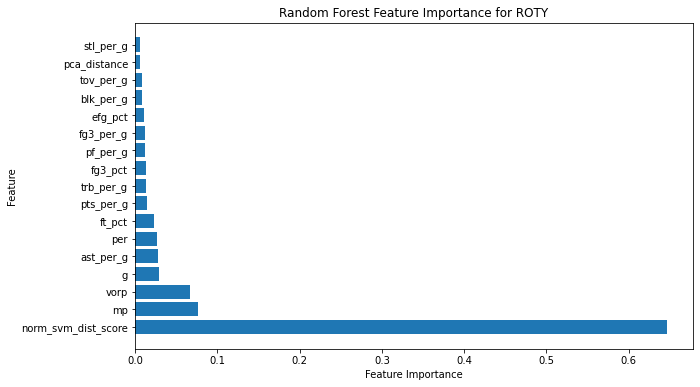

In [5]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Prepare your data


# Drop the 'won_dpoy' column to create the feature matrix
X = rookie.drop(columns=dropped_features)
y = rookie['share']  # Select only the 'won_dpoy' column as the target variable

# Step 2: Import libraries

# Step 3: Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Step 4: Fit the model to your data
rf_model.fit(X, y)

# Step 5: Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Step 6: Pair feature importances with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Step 7: Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize the importance of features using a bar plot
# Extract feature names and importances
features, importances = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for ROTY')
plt.show()

In [7]:
X.dtypes

g                        int64
fg3_per_g              float64
fg3_pct                float64
efg_pct                float64
ft_pct                 float64
trb_per_g              float64
ast_per_g              float64
stl_per_g              float64
blk_per_g              float64
tov_per_g              float64
pf_per_g               float64
pts_per_g              float64
mp                       int64
per                    float64
vorp                   float64
norm_svm_dist_score    float64
pca_distance           float64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from imblearn.over_sampling import SMOTE
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=np.random.randint(150))
clf = tree.DecisionTreeRegressor()
X = rookie[rookie['season'] != 2024]
X_names = X['player']
Y = X['share']
X = X.drop(columns=dropped_features)

X_pred = rookie[rookie['season'] == 2024]
X_pred_names = X_pred['player']
X_pred = X_pred.drop(columns=dropped_features)
display(X)
display(X_pred)
# oversample = SMOTE()
# X_S, y_S = oversample.fit_resample(X_train, y_train)
clf.fit(X, Y)

y_pred = clf.predict(X_pred)

,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,vorp,norm_svm_dist_score,pca_distance
93,29,0.0,0.500,0.567,0.816,2.7,0.4,0.4,0.5,0.6,1.8,4.0,342,15.9,0.2,-1.274449,0.033458
94,3,0.3,0.500,0.625,0.000,0.3,0.3,0.0,0.0,0.0,1.0,1.7,9,15.3,0.0,-4.279857,0.048194
95,81,0.6,0.359,0.481,0.758,4.1,1.2,0.6,0.2,1.2,1.7,9.2,2058,11.0,0.1,5.547742,0.033924
96,73,0.1,0.138,0.396,0.769,2.0,0.8,0.5,0.1,0.8,0.8,4.0,894,9.1,-0.6,-0.214601,0.019292
97,16,0.0,0.000,0.500,0.583,2.0,0.3,0.1,0.4,0.7,1.4,2.7,141,8.8,-0.2,-2.519895,0.016819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,75,1.0,0.356,0.567,0.812,4.5,3.3,1.4,0.5,1.6,2.5,14.1,2276,15.6,1.3,8.818581,0.071121
1130,49,0.9,0.407,0.534,0.704,4.9,1.6,0.6,0.2,0.8,2.3,5.9,914,11.2,0.1,2.186371,0.026089
1131,5,0.6,0.375,0.654,0.667,3.0,2.0,0.6,0.4,0.8,2.6,10.6,127,15.5,0.0,1.924690,0.033887
1132,43,0.0,0.000,0.637,0.691,7.1,0.4,0.7,1.0,0.9,2.2,9.0,828,19.8,0.4,2.944411,0.034631


,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,vorp,norm_svm_dist_score,pca_distance
0,6,0.5,0.333,0.472,0.000,2.7,1.0,0.2,0.2,0.2,1.0,2.8,90,8.1,-0.1,-1.118402,0.015915
1,10,0.0,0.000,0.487,0.778,3.7,0.8,0.4,1.0,1.0,2.8,4.5,171,9.4,-0.2,0.900300,0.013931
2,40,0.5,0.243,0.457,0.765,1.0,3.4,0.4,0.1,1.2,0.9,4.7,590,9.1,-0.5,1.248515,0.014145
3,3,0.0,0.000,0.500,0.500,0.3,0.0,0.0,0.0,0.0,0.3,1.0,10,5.0,0.0,-3.483174,0.037150
4,18,0.0,0.000,0.632,0.500,2.7,0.7,0.1,1.1,0.8,2.3,1.6,203,8.4,-0.2,-1.365690,0.006631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,60,1.2,0.417,0.621,0.793,2.3,1.4,0.8,0.4,0.4,1.6,6.7,1227,11.9,0.6,2.791240,0.036223
89,4,0.0,0.000,0.200,0.000,2.8,0.5,0.5,0.3,0.5,1.3,0.5,33,3.9,0.0,-1.804718,0.046041
90,55,1.7,0.333,0.522,0.815,10.2,3.4,1.3,3.4,3.4,2.2,20.9,1579,23.2,2.6,15.198411,0.129541
91,34,1.6,0.365,0.549,0.671,3.7,0.5,0.6,0.3,1.0,1.4,11.8,590,16.6,0.3,4.584953,0.037339


In [9]:
# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

In [10]:
X.sort_values('norm_svm_dist_score')

,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,vorp,norm_svm_dist_score,pca_distance
562,1,1.0,1.000,1.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,133.8,0.0,-12.491501,0.316440
299,3,0.0,0.000,1.000,0.000,0.3,0.0,0.0,0.0,0.0,0.3,0.7,2,40.8,0.0,-7.024382,0.095064
939,1,0.0,0.000,1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,76.2,0.0,-6.848337,0.145365
250,3,0.0,0.000,0.500,0.000,0.3,0.3,0.0,0.3,0.0,0.0,0.7,3,44.3,0.0,-6.368614,0.064115
1121,1,0.0,0.000,0.000,1.000,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2,65.6,0.0,-6.137976,0.054802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,72,1.2,0.298,0.465,0.738,6.9,3.7,0.8,0.5,2.8,2.2,20.0,2430,14.9,0.3,13.379096,0.090980
561,79,2.4,0.340,0.506,0.805,3.7,3.7,1.5,0.3,2.7,2.7,20.5,2638,16.7,2.2,13.664537,0.101778
181,70,0.8,0.264,0.431,0.703,6.2,6.3,1.9,0.6,3.5,3.0,16.7,2414,15.5,0.9,13.808146,0.120880
585,81,0.0,0.000,0.545,0.560,8.1,8.2,1.7,0.9,3.4,2.6,15.8,2732,20.0,4.5,14.281238,0.121994


In [11]:
y_pred

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.132, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.016, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.016, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.992, 0.   , 0.   ])

In [12]:
result = X_pred.copy()
result['predicted_share'] = y_pred
result['player'] = X_pred_names

In [13]:
result[result['predicted_share'] > 0].sort_values('predicted_share', ascending=False)

,g,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,vorp,norm_svm_dist_score,pca_distance,predicted_share,player
90,55,1.7,0.333,0.522,0.815,10.2,3.4,1.3,3.4,3.4,2.2,20.9,1579,23.2,2.6,15.198411,0.129541,0.992,Victor Wembanyama
37,60,1.7,0.397,0.615,0.785,7.8,2.7,0.7,2.6,1.7,2.5,17.2,1812,21.1,2.9,11.837034,0.106157,0.132,Chet Holmgren
64,52,1.2,0.366,0.524,0.613,5.8,3.9,0.8,0.2,1.3,1.8,9.7,1392,12.9,0.6,6.261987,0.048255,0.016,Brandin Podziemski
81,41,0.2,0.149,0.516,0.644,5.6,2.3,1.2,0.6,1.5,2.3,7.8,802,16.0,0.7,4.689308,0.040173,0.016,Amen Thompson
29,55,2.0,0.353,0.493,0.822,2.8,4.5,0.5,0.1,2.1,1.1,12.2,1415,11.2,-0.4,7.166255,0.050886,0.002,Keyonte George
53,54,2.3,0.377,0.521,0.829,4.1,2.4,0.9,0.5,1.8,2.5,16.7,1725,12.5,-0.4,9.663618,0.067920,0.002,Brandon Miller


In [14]:
result.columns

Index(['g', 'fg3_per_g', 'fg3_pct', 'efg_pct', 'ft_pct', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'vorp', 'norm_svm_dist_score', 'pca_distance',
       'predicted_share', 'player'],
      dtype='object')